<a href="https://colab.research.google.com/github/TokaOssama/COVID-19-Monitor/blob/master/Violence_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os 
training_dir = './drive/My Drive/Videos/Training'
testing_dir = './drive/My Drive/Videos/Testing'
validation_dir = './drive/My Drive/Videos/Validation'

train_normal_dir = os.path.join(training_dir, 'Normal')
train_violence_dir = os.path.join(training_dir, 'Violence')

test_normal_dir = os.path.join(testing_dir, 'Normal')
test_violence_dir = os.path.join(testing_dir, 'Violence')

val_normal_dir = os.path.join(validation_dir, 'Normal')
val_violence_dir = os.path.join(validation_dir, 'Violence')

print(os.listdir(train_violence_dir))
print(os.listdir(train_normal_dir))


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
['Violence_7.mp4', 'Violence_8.mp4', 'Violence_5.mp4', 'Violence_9.mp4', 'training (4).mp4', 'training (12).mp4', 'testing (4).mp4', 'training (7).mp4', 'training (8).mp4', 'training (10).mp4', 'training.mp4', 'training (9).mp4', 'training (5).mp4', 'Violence_14.mp4', 'Violence_17.mp4', 'Violence_18.mp4']
['Normal_1.mp4', 'Normal_7.mp4', 'Normal_9 (1).mp4', 'Normal_9.mp4', 'Normal_11.mp4', 'Normal_13.mp4', 'Normal_16.mp4', 'Normal_15.mp4', 'Normal_17.mp4', 'No

In [ ]:
import cv2 
import numpy as np
import tensorflow as tf



def extract_frames(loc):
    gray = 0
    resized = 0
    data = []
    #frames = []
    for video_name in os.listdir(loc):
        video = cv2.VideoCapture(os.path.join(loc,video_name))
        new_packet = []
        i = 0
        dim = (50, 50)
        while video.isOpened():
            ret, frame = video.read()
            if not ret:
                break
            if i%2 ==0: # Works for 30 fps videos to capture only 15 fps
                i += 1
                continue
            resized = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
            #frames.append(resized) #Sample frames for plotting 
            gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
            new_packet.append(gray)
            if len(new_packet) == 15:
                stacked = np.array(new_packet)/255.
                data.append(stacked)
                
                new_packet.pop(0)
            i += 1
        video.release()

    cv2.destroyAllWindows()
    #
    data = np.stack(data, axis = 0)
    #move frame dimension to be the last for the model to accept it
    data = np.moveaxis(data, 1, -1)
    return data

    
train_violence_data = extract_frames(train_violence_dir)
train_normal_data  = extract_frames(train_normal_dir)

val_violence_data = extract_frames(val_violence_dir)
val_normal_data = extract_frames(val_normal_dir)

test_violence_data = extract_frames(test_violence_dir)
test_normal_data = extract_frames(test_normal_dir)


In [ ]:
print("Training Violence tensors = " , len(train_violence_data))
print("Training Normal tensors = " , len(train_normal_data))
print("Validation Violence tensors = " , len(val_violence_data))
print("Validation Normal tensors = " , len(val_normal_data))
print("Testing Violence tensors = " , len(test_violence_data))
print("Testing Normal tensors = " , len(test_normal_data))

Training Violence tensors =  5635
Training Normal tensors =  5533
Validation Violence tensors =  1098
Validation Normal tensors =  1536
Testing Violence tensors =  1017
Testing Normal tensors =  1371


In [ ]:
print(train_violence_data.shape)
print(train_normal_data.shape)

(5635, 50, 50, 15)
(5533, 50, 50, 15)


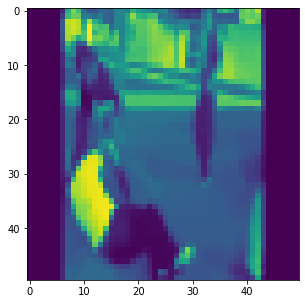

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sample = train_violence_data[4060,:,:,0]
plt.imshow(sample)

In [ ]:
# y_train = np.concatenate([np.zeros(len(train_normal_data)), np.ones(len(train_violence_data))])
# x_train = np.concatenate([train_normal_data, train_violence_data], axis = 0)

# y_val = np.concatenate([np.zeros(len(val_normal_data)), np.ones(len(val_violence_data))])
# x_val = np.concatenate([val_normal_data, val_violence_data], axis = 0)

# y_test = np.concatenate([np.zeros(len(test_normal_data)), np.ones(len(test_violence_data))])
# x_test = np.concatenate([test_normal_data, test_violence_data], axis = 0)
y_train = np.concatenate([np.zeros(5500), np.ones(5500)])
x_train = np.concatenate([train_normal_data[:5500,:,:,:], train_violence_data[:5500,:,:,:]], axis = 0)

y_val = np.concatenate([np.zeros(1000), np.ones(1000)])
x_val = np.concatenate([val_normal_data[:1000,:,:,:], val_violence_data[:1000,:,:,:]], axis = 0)

y_test = np.concatenate([np.zeros(890), np.ones(890)])
x_test = np.concatenate([test_normal_data[:890,:,:,:], test_violence_data[:890,:,:,:]], axis = 0)

print((x_train.shape, y_train.shape))



((11000, 50, 50, 15), (11000,))


In [ ]:
#shuffling data
per_train = np.random.permutation(len(x_train))
per_val = np.random.permutation(len(x_val))
per_test = np.random.permutation(len(x_test))


print(per_test)
print(len(x_train))

[1161  710   11 ...   82 1486 1693]
11000


In [ ]:
y_train = y_train[per_train]
x_train = x_train[per_train,:,:,:]
y_train = y_train.astype(int)


y_val = y_val[per_val]
x_val = x_val[per_val,:,:,:]
y_val = y_val.astype(int)

y_test = y_test[per_test]
x_test = x_test[per_test,:,:,:]
y_test = y_test.astype(int)

print(y_train[50:70])
print(y_val[0:20])
print(y_test[0:20])

[0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1]
[1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1]
[1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0]


In [ ]:
 print((x_train.shape, y_train.shape))
print((x_val.shape, y_val.shape))
print((x_test.shape, y_test.shape))


((11000, 50, 50, 15), (11000,))
((2000, 50, 50, 15), (2000,))
((1780, 50, 50, 15), (1780,))


In [ ]:
 dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val = tf.data.Dataset.from_tensor_slices((x_val, y_val))

# val = tf.data.Dataset.from_tensor_slices((x_train, y_train))

dataset = dataset.repeat(1)
dataset = dataset.batch(32)

val = val.repeat(1)
val = val.batch(32)


In [ ]:
 for x in val.take(1):
    print(x[1])
    # print(tf.shape(x[1]))

tf.Tensor([1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0], shape=(32,), dtype=int64)


In [ ]:
  model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image
    # 150x150 with 3 bytes color.
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', 
                          input_shape = (50, 50, 15), padding = 'same'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    # Flatten the results to feed into the densely connected layer.
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    # 512 neuron hidden layer.
    tf.keras.layers.Dense(128, activation = 'relu'),
    # Only 1 output neuron for binary classification task.
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 256)       34816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 256)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 25, 25, 256)       1024      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 256)       590080    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 12, 12, 256)      

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['acc', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
    #Adding early_stopping callback

#early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 6, restore_best_weights= True)

In [ ]:
 log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(dataset,
         epochs=10,
         validation_data = val,          
         callbacks=[tensorboard_callback],
         )

Epoch 1/10
344/344 [==============================] - 11s 32ms/step - loss: 0.0980 - acc: 0.9740 - recall: 0.9751 - precision: 0.9730 - val_loss: 0.3723 - val_acc: 0.9650 - val_recall: 0.9600 - val_precision: 0.9697
Epoch 2/10
344/344 [==============================] - 10s 29ms/step - loss: 0.0122 - acc: 0.9968 - recall: 0.9965 - precision: 0.9971 - val_loss: 0.1265 - val_acc: 0.9595 - val_recall: 0.9830 - val_precision: 0.9389
Epoch 3/10
344/344 [==============================] - 10s 29ms/step - loss: 0.0081 - acc: 0.9978 - recall: 0.9978 - precision: 0.9978 - val_loss: 0.0810 - val_acc: 0.9795 - val_recall: 0.9740 - val_precision: 0.9848
Epoch 4/10
344/344 [==============================] - 10s 29ms/step - loss: 0.0030 - acc: 0.9990 - recall: 0.9991 - precision: 0.9989 - val_loss: 0.3934 - val_acc: 0.9445 - val_recall: 0.9610 - val_precision: 0.9303
Epoch 5/10
344/344 [==============================] - 10s 30ms/step - loss: 0.0025 - acc: 0.9994 - recall: 0.9989 - precision: 0.9998 - 

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
 x = model.evaluate(x_test, y_test)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred = [1 * (x[0]>=0.5) for x in y_pred]

con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

In [ ]:
import pandas as pd

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=3)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = [0,1], 
                     columns = [0,1])

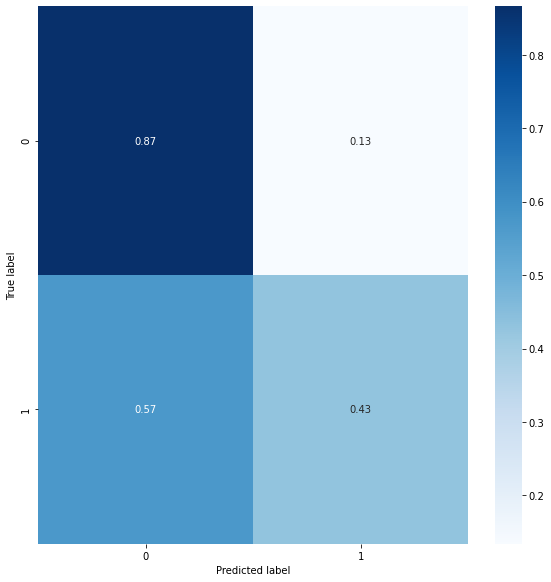

In [ ]:
import seaborn as sns
	
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')  
plt.xlabel('Predicted label')
plt.show()

In [ ]:

# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
    

In [ ]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

Using TensorFlow backend.


In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

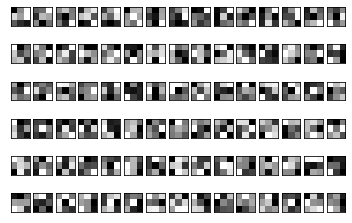

In [ ]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(15):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 15, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()